# Work In Progress 👷‍
This is my first Kaggle competition and is a work in progress. Please comment below if you have any questions or ideas. 

# Table of Contents
1. Overview
1. System Setup
1. Exploratory Data Analysis
1. Preprocessing
1. Training Models
1. Evaluate -> Tune -> Ensemble
1. Conclusion

# 1. Overview
*To be updated*
## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)

Survived (contains your binary predictions: 1 for survived, 0 for deceased)

```
PassengerId,Survived
892,0
893,1
894,0
Etc.
```

# 2. Setup

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [24]:
# Check python system version
import sys
sys.version

'3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 21:08:20) \n[GCC 9.3.0]'

# 3. Exploratory Data Analysis
Credits: [Ken Jee](https://www.kaggle.com/kenjee/titanic-project-example), [Emanuele Panizio](https://www.kaggle.com/emanuelepanizio/pytanicnb/notebook), [Ju Liu](https://www.youtube.com/watch?v=fS70iptz-XU&t=2569s])

References: [Data](https://www.kaggle.com/c/titanic/data)

Functions to try out:
* create subplots 
* seaborn and plt plots
* sns.barplot
* sns.countplot
* [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
* sns.catplot
* sns.displot
* pivot_table
* plot fares as line and bins

In [25]:
# load the training and test data

train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

In [26]:
# inspect the dataframe
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# inspect the dataframe for entries, columns, missing values, and data types

train.info()
print('')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 no

### Observations:
* ML models must have numerical values to compute, there fore categorical datatype `objects` must be converted to numerical values.
* Nan values to address with imputation: `['Age', 'Fare', 'Cabin', 'Embark']`
* Nan values to drop: `['Name']`
* Test dataset has 1 less column: `['Survived']` which is the target or label

In [28]:
# Statistical values for all the numerical categories

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations
* Fare has a wide distribution. Let's dive deeper:
    * Viz - histogram, normalize
    * Pivot table by various categories: Age, Sex, Survived, Pclass
* Create histograms for `['Age', 'SibSp', 'Parch', 'Fare']`to see spread of instances

In [29]:
# list of columns for segmentation

train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
# split categorical and numerical dataframes for analysis

df_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = train.drop(['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

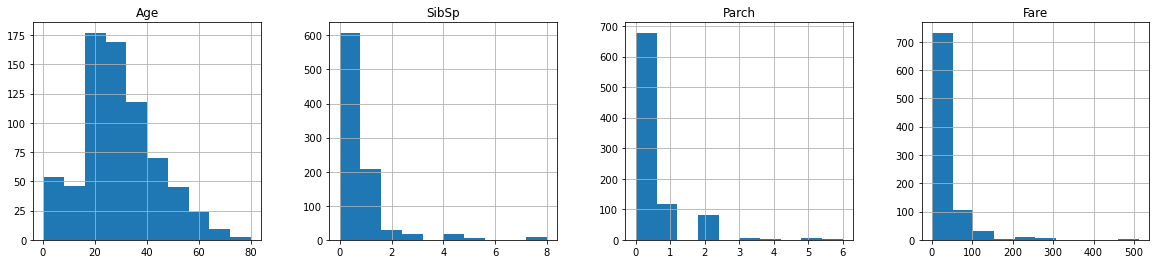

In [31]:
# shapes of quantitative features
train.hist(column=df_num.columns, figsize=(20,4), layout=(1,4))

<AxesSubplot:xlabel='Fare', ylabel='Count'>

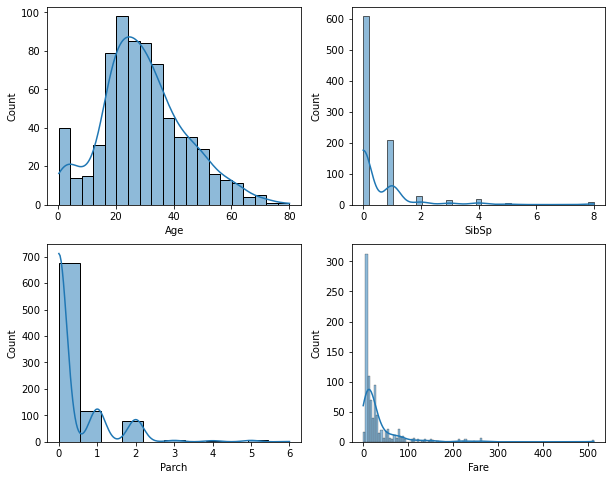

In [32]:
# plot hist with kernal density edstimation to get an average line
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=train, x='Age', kde=True, ax=ax[0,0])
sns.histplot(data=train, x='SibSp', kde=True, ax=ax[0,1])
sns.histplot(data=train, x='Parch', kde=True, ax=ax[1,0])
sns.histplot(data=train, x='Fare', kde=True, ax=ax[1,1])

### Observations:
* Only 'Age' has a somewhat normal distribution. The other values are skewed to the left with longtails to the right. 
    * Does age group affect the survival rate? Bin by age group
    * Most of the population is in their late teens to late 30s.
* Most paid a low fare, many are single with no family
* Should we normalize these values using a logarithmic method?

In [33]:
# Gender breakdown
print(train['Sex'].value_counts())
print()
print(train['Sex'].value_counts(normalize=True)) #Percentage breakdown

male      577
female    314
Name: Sex, dtype: int64

male      0.647587
female    0.352413
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

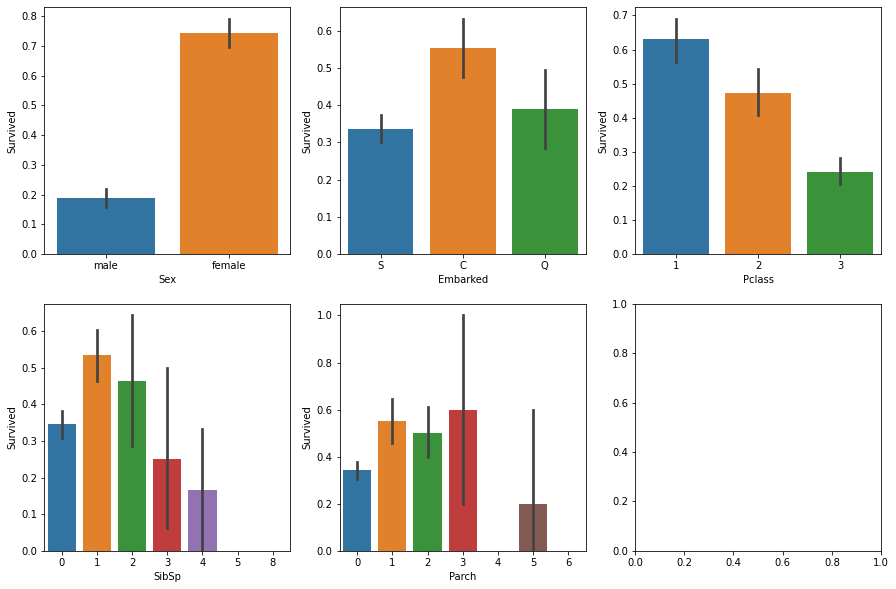

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
sns.barplot(x='Sex', y='Survived', data=train, ax=ax[0,0])
sns.barplot(x='Embarked', y='Survived', data=train, ax=ax[0,1])
sns.barplot(x='Pclass', y='Survived', data=train, ax=ax[0,2])
sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[1,0])
sns.barplot(x='Parch', y='Survived', data=train, ax=ax[1,1])
# sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[1,2])

### Observations:
* Many more females survived
* People who embarked from Cherbourg had higher survival rate. Let's explore this further?
* First and second class passangers survived better. Due to location of cabins?
* Smaller families had higher survival rates,best if you had 1 or 2 other people in your family.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

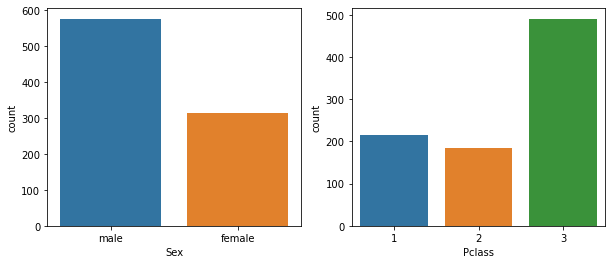

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='Sex', data=train, ax=ax[0])
sns.countplot(x='Pclass', data=train, ax=ax[1])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

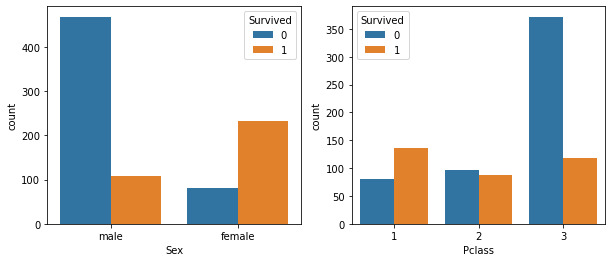

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='Sex', data=train, hue='Survived', ax=ax[0])
sns.countplot(x='Pclass', data=train, hue='Survived', ax=ax[1])

### Observations:
* People were more chivalrous back in then? Or women were better able to negotiate their way on to life boats? Maybe they were with their children?
* 

In [37]:
columns = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
for column in columns:
    print(pd.pivot_table(train, index='Survived', columns=column, values='Name', aggfunc='count'))
    print()

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN



In [38]:
print('Value Counts')
print(pd.pivot_table(train, index='Pclass', columns='Embarked', values='Name', aggfunc='count'))
print('')
print('Average Fare Amount')
print(pd.pivot_table(train, index='Pclass', columns='Embarked', values='Fare', aggfunc='median'))

Value Counts
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353

Average Fare Amount
Embarked        C      Q      S
Pclass                         
1         78.2667  90.00  52.00
2         24.0000  12.35  13.50
3          7.8958   7.75   8.05


Text(0.5, 1.0, 'Age Distribution Boxplot By Embarkement')

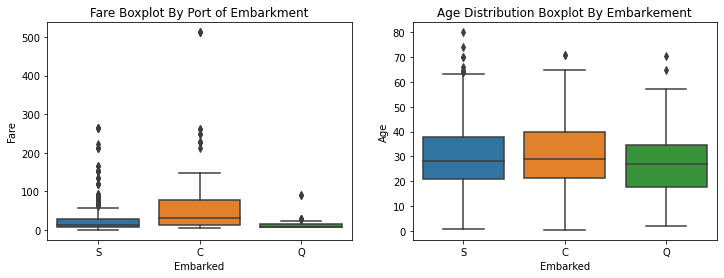

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='Embarked', y='Fare', data=train, ax=ax[0])
sns.boxplot(x='Embarked', y='Age', data=train, ax=ax[1])
# sns.boxplot(x='Embarked', y='Age', hue='Sex', data=train, ax=ax[2])

ax[0].set_title('Fare Boxplot By Port of Embarkment')
ax[1].set_title('Age Distribution Boxplot By Embarkement')

### Observations:
* People from Cherbourg, France are able to pay more money for fare, and support the hypothesis that wealther passengers had a higher chance of survival. 
* Major outliers for Cherbourg dataset 
* Wealth matters. Please from 1st class had higher rates of survival, and more people survived rather than drowned compared to the other classes. 
* You have a higher chance of surviving if you're solo or have 1 family member with you compared to a large family. Maybe it was difficult to choose which family member would survive? Or maybe it was more expensive to have a 1st class cabin and better location to boats?



<AxesSubplot:xlabel='Age', ylabel='Fare'>

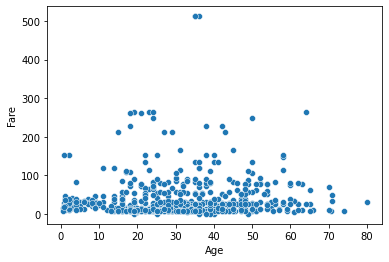

In [40]:
sns.scatterplot(data=train, x='Age', y="Fare")

In [41]:
cut_labels = ['>10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
# cut_bins = [0, 70000, 100000, 130000, 200000]
cut_df = train
cut_df['cut_age'] = pd.cut(cut_df['Age'], bins=8, labels=cut_labels)
age_bin_df = cut_df.groupby(['cut_age']).sum()
print(type(age_bin_df))
age_bin_df

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Age,SibSp,Parch,Fare
cut_age,,,,,,
>10,38,169,273.17,118,91,1947.8041
11-20,44,291,1991.50,68,45,3395.8961
21-30,84,549,5847.50,74,55,6510.5453
31-40,69,324,5433.00,58,61,6586.8955
41-50,33,165,3902.00,32,37,3540.0336
51-60,17,64,2305.50,13,13,1880.5417
61-70,4,26,1086.00,3,6,780.4833
71-80,1,9,366.50,0,0,129.6834


In [42]:
train = train.drop(columns=['cut_age'])

Text(0.5, 1.0, 'Surviors by Age')

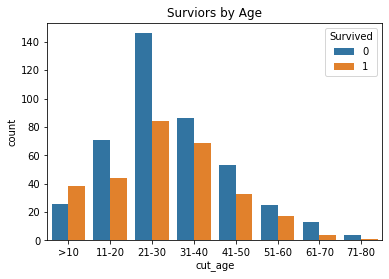

In [43]:
g = sns.countplot(data=cut_df, x='cut_age', hue='Survived')
g.set_title('Surviors by Age')

### Observations:
* Survival based on age followed a somewhat normal distribution with a tail to the right with older people.
* Young children and infants survived more than died. Probably the mentality of women and children to be saved first. 
* High rates of survival for people in their 30s, 40s and 50s. 


## Outliers
Do an analysis of the outliers

# 4. Preprocessing Data
* Test a quick and dirty data set
* Pull out the Mr/Mrs titles for data processing
* Categorial data must me turned into numerical with [One Hot Encoding or Get Dummies](https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970)
    * 'Pclass' - use `integer encoding` or ORDINAL VALUES
    * 2 catagroical variables, get dummies k-1 example: `pd.get_dummies(df.Sex, drop_first=True)`
    * 3 or more categorical vars, `pd.get_dummies(df.Embarked, prefix='Embarked')`
    * Multiple columns `df = pd.get_dummies(df, columns=['Sex', 'Embarked'])`
    * Join the encoded features to df with concat(): `df = pd.concat([df, embarked_dummies], axis=1)`
* Create function called `wrangle()` to do all the pre-processing to `return X_train, X_test, y_train`
* Scaling vs Normalization - [article1](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/), [article2](https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler)
* Must scale or normalize: `['Fare', 'Age']`
* Impute Age - fillna()
```
#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())
```

In [44]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [45]:
train_df_2 = pd.get_dummies(train, columns=['Sex', 'Embarked'])
X_train = train_df_2.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
X_train.Age = X_train.Age.fillna(train.Age.median())
print(train.Age.median())


test_df_2 = pd.get_dummies(test, columns=['Sex', 'Embarked'])
X_test = test_df_2.drop(columns=['Name', 'Ticket', 'Cabin'])
X_test.Age = X_test.Age.fillna(test.Age.median())
X_test.Fare = X_test.Fare.fillna(test.Fare.mean())
print(X_train.shape)
print(X_test.shape)
X_train.head()

28.0
(891, 10)
(418, 10)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
y_train = train['Survived']
y_train.shape

(891,)

In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 21.6 KB


# 5. Train Model
* Decision Tree
* Try graphing this
``` 
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
```

In [48]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,1


## Decision Tree Classifier

In [49]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print(f'Train data score: {clf.score(X_train, y_train)}')
# print(f'Test data score: {clf.score(X_test, y_test)}')

Train data score: 0.9797979797979798


# 6. Evaluate -> Tune -> Ensemble
* gridsearch
* cross validation

# 7. Conclusion
* Write up
* Submissions with different names

In [50]:
y_hat = clf.predict(X_test)
y_hat
# now you must concat this to results df and submit

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [51]:
# prepare submission
submission_tree = pd.DataFrame({'PassengerID': X_test.index, 'Survived': y_hat})
submission_tree.to_csv('my_submission.csv', index=False)
submission_tree

,PassengerID,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
